In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
covid_data = pd.read_csv("owid-covid-data.csv")
recovered_data = pd.read_csv("covid19_recovered_global.csv")

In [3]:
covid_data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
#convert the date column to datetime type

In [5]:
covid_data.date = pd.to_datetime(covid_data.date)

In [6]:
#prepare the data set covid_data_filtered_per_million taking data about list of countries in the last day that in the dataset 

In [7]:
last_date = covid_data['date'].max()
covid_data_filtered_per_million = covid_data[["location","date", "total_cases_per_million","total_deaths_per_million"]]

In [8]:
covid_data_filtered_per_million = covid_data_filtered_per_million[covid_data_filtered_per_million['date']==last_date]
covid_data_filtered_per_million  = covid_data_filtered_per_million .loc[(covid_data_filtered_per_million ['location'] =='Israel' )| 
                                                      ( covid_data_filtered_per_million ['location'] =='Austria' )|
                                                       (covid_data_filtered_per_million ['location'] =='Italy' )|
                                                        (covid_data_filtered_per_million ['location'] =='Brazil' )|
                                                        (covid_data_filtered_per_million ['location'] =='Germany' )|
                                                        (covid_data_filtered_per_million ['location'] =='United Kingdom' )|
                                                        (covid_data_filtered_per_million ['location'] =='Iran' )|
                                                        (covid_data_filtered_per_million ['location'] =='World' )|
                                                       (covid_data_filtered_per_million ['location'] =='United States')]

In [9]:
covid_data_filtered_per_million.head()

,location,date,total_cases_per_million,total_deaths_per_million
884,Austria,2020-04-29,1700.346,63.177
1947,Brazil,2020-04-29,338.193,23.603
3333,Germany,2020-04-29,1881.518,72.985
4840,United Kingdom,2020-04-29,2373.759,319.329
6373,Iran,2020-04-29,1102.283,69.970


In [10]:
#Creating 2 Bar plot based on covid_data_filtered_per_million data 
#here we compare the number of cases and people died from covid-19 per million population in multiple countries

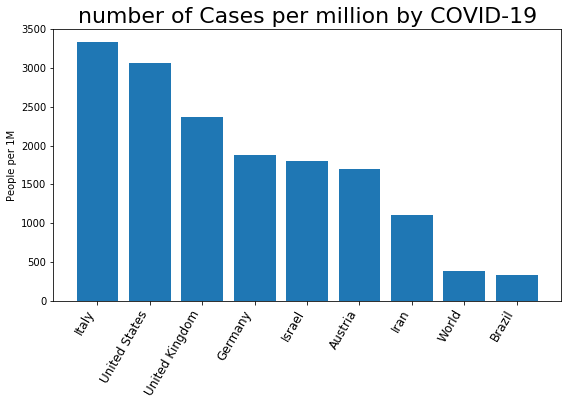

In [11]:
covid_data_filtered_per_million=covid_data_filtered_per_million.sort_values('total_cases_per_million',ascending=False)
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(1,2,1)
ax1.bar(covid_data_filtered_per_million.location,covid_data_filtered_per_million['total_cases_per_million'])
ax1.set_xticklabels(covid_data_filtered_per_million.location,rotation=60,horizontalalignment='right',fontsize='12')
ax1.set_title('number of Cases per million by COVID-19',fontsize=22)
ax1.set_ylabel('People per 1M')
plt.show()

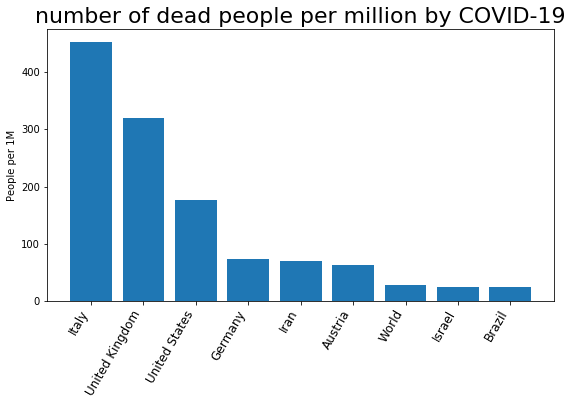

In [12]:
covid_data_filtered_per_million=covid_data_filtered_per_million.sort_values('total_deaths_per_million',ascending=False)
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(1,2,1)
ax1.bar(covid_data_filtered_per_million.location,covid_data_filtered_per_million['total_deaths_per_million'])
ax1.set_xticklabels(covid_data_filtered_per_million.location,rotation=60,horizontalalignment='right',fontsize='12')
ax1.set_title('number of dead people per million by COVID-19',fontsize=22)
ax1.set_ylabel('People per 1M')
plt.show()

In [13]:
#droping many columns and stay with "location","date","total_cases","total_deaths"

In [14]:
covid_data_filtered = covid_data[["location","date","total_cases","total_deaths"]]

In [15]:
#create to data set from covid_data_filtered 
#1) data of 4 contries Israel,Spain,Italy,US
#2) data of all the world together

In [16]:
covid_data_filtered_countries = covid_data_filtered.loc[(covid_data_filtered['location'] =='Israel' )| 
                                                      ( covid_data_filtered['location'] =='Spain' )|
                                                       (covid_data_filtered['location'] =='Italy' )|
                                                       (covid_data_filtered['location'] =='United States')]

In [17]:
covid_data_filtered_countries.head()

,location,date,total_cases,total_deaths
4039,Spain,2019-12-31,0,0
4040,Spain,2020-01-01,0,0
4041,Spain,2020-01-02,0,0
4042,Spain,2020-01-03,0,0
4043,Spain,2020-01-04,0,0


In [18]:
covid_data_filtered_world = covid_data_filtered.loc[covid_data_filtered['location'] =='World']

In [19]:
covid_data_filtered_world.head()

,location,date,total_cases,total_deaths
13905,World,2019-12-31,27,0
13906,World,2020-01-01,27,0
13907,World,2020-01-02,27,0
13908,World,2020-01-03,44,0
13909,World,2020-01-04,44,0


In [20]:
recovered_data.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,135,150,166,179,188,188,207,220,228,252
1,Albania,0,0,0,0,0,0,0,0,0,...,327,345,356,385,394,403,410,422,431,455
2,Algeria,0,0,0,0,0,0,0,0,0,...,1099,1152,1204,1355,1408,1479,1508,1558,1651,1702
3,Andorra,0,0,0,0,0,0,0,0,0,...,248,282,309,333,344,344,344,385,398,423
4,Angola,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,7


In [21]:
#reshape the recovered_data table

In [22]:
recovered_data =pd.melt(recovered_data,id_vars=["Country/Region"],var_name="date", value_name="recovered")

In [23]:
#rename the colums names

In [24]:
recovered_data.columns = ['location','date','recovered']

In [25]:
recovered_data.head()

,location,date,recovered
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


In [26]:
#convert the date column to datetime type

In [27]:
recovered_data.date = pd.to_datetime(recovered_data.date)

In [28]:
#we creating a table that have no dupicates in the columns 'date', and every row represent the number of recovered
#people from all over the world at the same date

In [29]:
recovered_data_world = recovered_data[["date", "recovered"]].groupby('date').sum()

In [30]:
recovered_data_world.head()

,recovered
date,
2020-01-22,28
2020-01-23,30
2020-01-24,36
2020-01-25,39
2020-01-26,52


In [31]:
#here we execute join between covid_data_filtered_countries recovered_data 

In [32]:
covid_countries = pd.merge(covid_data_filtered_countries,recovered_data ,on =['location', 'date'] )

In [33]:
covid_countries.head()

,location,date,total_cases,total_deaths,recovered
0,Spain,2020-01-22,0,0,0
1,Spain,2020-01-23,0,0,0
2,Spain,2020-01-24,0,0,0
3,Spain,2020-01-25,0,0,0
4,Spain,2020-01-26,0,0,0


In [34]:
#here we execute join between covid_data_filtered_world recovered_data_world

In [35]:
covid_world_data = pd.merge(covid_data_filtered_world,recovered_data_world,on = 'date')

In [36]:
covid_world_data.head()

,location,date,total_cases,total_deaths,recovered
0,World,2020-01-22,534,17,28
1,World,2020-01-23,631,17,30
2,World,2020-01-24,897,26,36
3,World,2020-01-25,1350,41,39
4,World,2020-01-26,2023,56,52


In [37]:
#the plot represent the growth of the pandemic during the time line
# we can see that from the begining of march the numbers of new cases growth exponential
#here in israel we can hear from the news that the number of patiants decrease but in the graph we can see that
#when looking at the entire world the number still increase

/home/edenpa/.local/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/home/edenpa/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


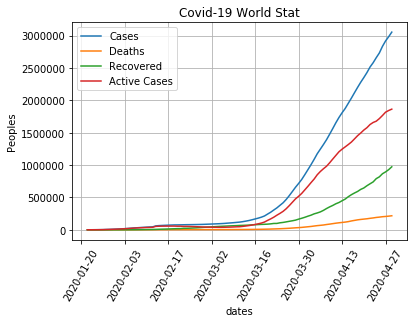

In [38]:
plt.plot(covid_world_data.date, covid_world_data.total_cases)
plt.plot(covid_world_data.date, covid_world_data.total_deaths)
plt.plot(covid_world_data.date, covid_world_data.recovered)
plt.plot(covid_world_data.date, covid_world_data.total_cases - covid_world_data.total_deaths - covid_world_data.recovered)
plt.legend(["Cases","Deaths","Recovered","Active Cases"])
plt.title("Covid-19 World Stat")
plt.xlabel("dates")
plt.ylabel("Peoples")
plt.grid('on',which = 'major')
plt.xticks(rotation = 60)
plt.show()

In [39]:
covid_israel = covid_countries.loc[covid_countries['location'] =='Israel'] 
isr_pop = 8.884
covid_spain = covid_countries.loc[covid_countries['location'] =='Spain'] 
spn_pop = 46.94
covid_italy = covid_countries.loc[covid_countries['location'] =='Italy'] 
itl_pop = 60.36
covid_usa = covid_countries.loc[covid_countries['location'] =='United States'] 
us_pop = 328.2

In [40]:
#the next plot represent the growth of the pandemic during the time line specific in several countries
#we can see that in Israel,Spain the number of patiants decrease
#in Italy it stable and in the US it still increase

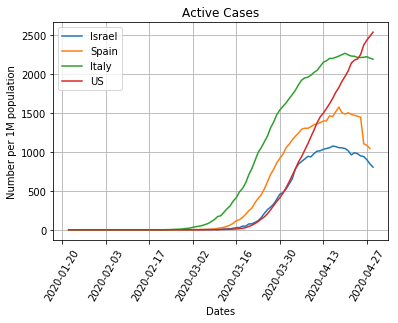

In [41]:
plt.plot(covid_israel.date, (covid_israel.total_cases - covid_israel.total_deaths - covid_israel.recovered)/isr_pop)
plt.plot(covid_spain.date, (covid_spain.total_cases - covid_spain.total_deaths - covid_spain.recovered)/itl_pop)
plt.plot(covid_italy.date, (covid_italy.total_cases - covid_italy.total_deaths - covid_italy.recovered)/spn_pop)
plt.plot(covid_usa.date, (covid_usa.total_cases - covid_usa.total_deaths - covid_usa.recovered)/us_pop)
plt.legend(["Israel","Spain","Italy","US"])
plt.title("Active Cases")
plt.xlabel("Dates")
plt.ylabel("Number per 1M population")
plt.grid('on',which = 'major')
plt.xticks(rotation = 60)
plt.show()

In [42]:
israel_deaths = pd.read_csv("death_israel.csv")

In [43]:
israel_deaths.head()

,age,sex,city,date
0,91,female,Or Yehuda,04/11/2020
1,86,female,Azor,4/14/2020
2,82,male,Eilat,4/18/2020
3,72,male,Ashdod,3/31/2020
4,76,male,Ashkelon,04/03/2020


In [44]:
#droping the colums 'city' and 'date'

In [45]:
israel_deaths = israel_deaths[["age","sex"]]

In [46]:
israel_deaths['age'] = israel_deaths['age'] .astype(int)

In [47]:
israel_deaths.head()

,age,sex
0,91,female
1,86,female
2,82,male
3,72,male
4,76,male


In [48]:
sns.set(style='whitegrid')

In [49]:
#here we create a box plot represent the ages of the people who died from covid-19 in Israel
#we can see that the average for male it's close to 80 and for female it's over 85

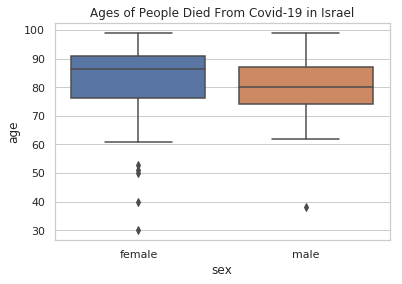

In [50]:
box_plt = sns.boxplot(x=israel_deaths['sex'],y= israel_deaths['age']).set_title('Ages of People Died From Covid-19 in Israel')



In [51]:
#read the data of Zoom_stock and stay only with the column "date","Open"

In [52]:
Zoom_stock=pd.read_csv('zoom_stock.csv')
Zoom_stock.head()

,date,Open,High,Low,Last,Change,Volume
0,03/30/2020,160.76,161.69,147.20,150.88,-0.82,15762100
1,03/27/2020,145.70,154.97,145.60,151.70,10.55,13271900
2,03/26/2020,140.51,146.65,138.20,141.15,3.04,9284000
3,03/25/2020,140.10,149.00,136.20,138.11,2.93,14743000
4,03/24/2020,154.00,155.00,133.88,135.18,-24.38,22401300


In [53]:
del_stock = pd.read_csv("DEL_stock.csv")
del_stock.head()

,Time,date,High,Low,Last,Change,Volume
0,04/28/2020,23.00,24.90,22.65,24.34,2.18,83972096
1,04/27/2020,22.83,23.44,22.00,22.16,-0.25,50561600
2,04/24/2020,22.53,22.68,21.75,22.41,-0.07,43766600
3,04/23/2020,22.65,22.96,22.41,22.48,0.01,43581800
4,04/22/2020,23.88,23.94,21.63,22.47,-0.63,70221296


In [54]:
Zoom_stock['date']=pd.to_datetime(Zoom_stock['date'])
del_stock['Time']=pd.to_datetime(del_stock['Time'])

In [55]:
Zoom_stock_filter=Zoom_stock[["date","Open"]]
del_stock_filter = del_stock[["Time", "Last"]]

In [56]:
del_stock_filter.columns = ['date','Last']

In [57]:
#here we execute join between covid_data_filtered_world Zoom_stock_filter / del_stock_filter

In [58]:
cases_and_zoom_stock = pd.merge(covid_data_filtered_world,Zoom_stock_filter,on = 'date')
cases_and_del_stock = pd.merge(covid_data_filtered_world,del_stock_filter, on = 'date')

In [59]:
#Here we Create 2 scatter plot that show the effect of COVID-19 on Zoom and Delta Airlines stock
#we can see that when the numbers of new cases growth zoom stock jump high significantly and Delta stock drop significantly

Text(0.5,0.98,'The Effect of COVID-19 on Zoom Stock')

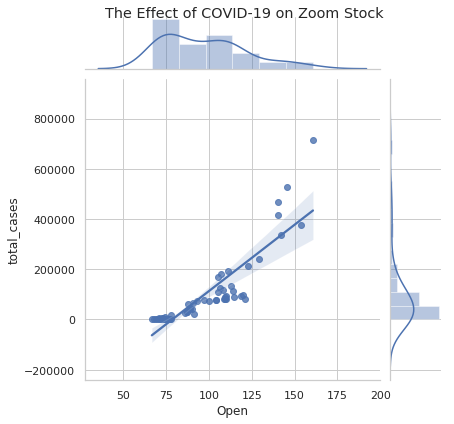

In [60]:
g_zoom = sns.jointplot(x='Open',y='total_cases',data=cases_and_zoom_stock,kind='reg')
g_zoom.fig.suptitle("The Effect of COVID-19 on Zoom Stock")

Text(0.5,0.98,'The Effect of COVID-19 on del Stock')

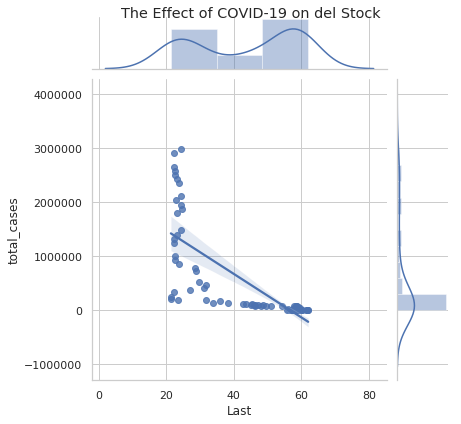

In [61]:
g_del = sns.jointplot(x='Last',y='total_cases',data=cases_and_del_stock,kind='reg')
g_del.fig.suptitle("The Effect of COVID-19 on del Stock")